In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv(r"D:\SQL\csv_files_python\2_top_paying_jobs_skills.csv")

In [3]:
df

,job_id,job_title,salary_year_avg,company_name,skills
0,552322,Associate Director- Data Insights,255829.5,AT&T,sql
1,552322,Associate Director- Data Insights,255829.5,AT&T,python
2,552322,Associate Director- Data Insights,255829.5,AT&T,r
3,552322,Associate Director- Data Insights,255829.5,AT&T,azure
4,552322,Associate Director- Data Insights,255829.5,AT&T,databricks
...,...,...,...,...,...
61,1749593,Principal Data Analyst,186000.0,SmartAsset,tableau
62,1749593,Principal Data Analyst,186000.0,SmartAsset,gitlab
63,387860,ERM Data Analyst,184000.0,Get It Recruit - Information Technology,sql
64,387860,ERM Data Analyst,184000.0,Get It Recruit - Information Technology,python


In [4]:
df_skills = df[["salary_year_avg", "skills"]].copy()

In [5]:
df_skills

,salary_year_avg,skills
0,255829.5,sql
1,255829.5,python
2,255829.5,r
3,255829.5,azure
4,255829.5,databricks
...,...,...
61,186000.0,tableau
62,186000.0,gitlab
63,184000.0,sql
64,184000.0,python


In [6]:
job_skills = df_skills.groupby("skills").agg(
    salary_median=("salary_year_avg", "median"),
    skill_count=("skills", "size")
).sort_values(by="skill_count", ascending=False)

job_skills

,salary_median,skill_count
skills,,
sql,197154.50,8
python,189309.00,7
tableau,211000.00,6
r,210711.50,4
snowflake,189309.00,3
excel,205000.00,3
pandas,205000.00,3
aws,222569.25,2
power bi,222569.25,2


In [7]:
job_skills = job_skills.head(10)

In [8]:
job_skills

,salary_median,skill_count
skills,,
sql,197154.50,8
python,189309.00,7
tableau,211000.00,6
r,210711.50,4
snowflake,189309.00,3
excel,205000.00,3
pandas,205000.00,3
aws,222569.25,2
power bi,222569.25,2


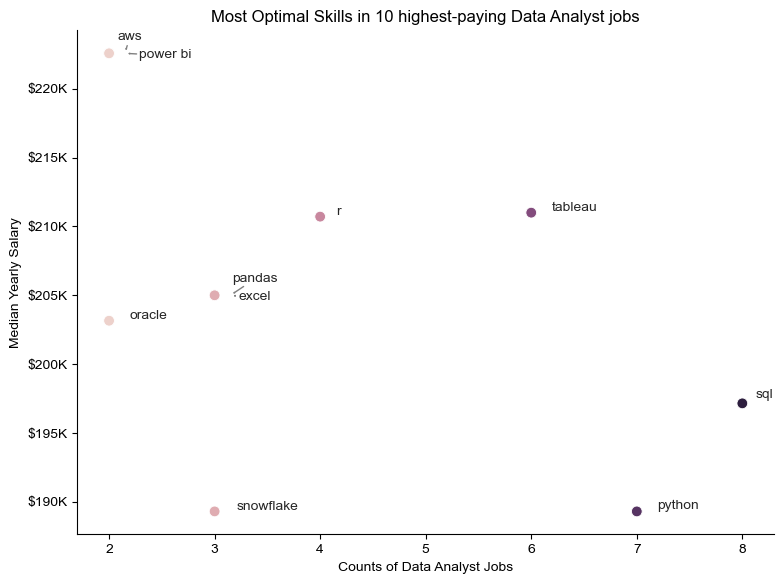

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=job_skills,
    x="skill_count",
    y="salary_median",
    hue="skill_count",
    s=60
)
sns.despine()
sns.set_theme(style="ticks")

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(job_skills.index):
    x = job_skills['skill_count'].iloc[i]
    y = job_skills['salary_median'].iloc[i]
    texts.append(plt.text(x + 0.15, y + 0.15, txt, fontsize=10))

# Adjust text to avoid overlap
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray"))

# Set axis labels, title and legend
plt.xlabel('Counts of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title("Most Optimal Skills in 10 highest-paying Data Analyst jobs")
plt.legend().remove()

# Formating x, y axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))

# Adjust layout and display 
plt.tight_layout()
plt.show()

In [10]:
job_skills

,salary_median,skill_count
skills,,
sql,197154.50,8
python,189309.00,7
tableau,211000.00,6
r,210711.50,4
snowflake,189309.00,3
excel,205000.00,3
pandas,205000.00,3
aws,222569.25,2
power bi,222569.25,2


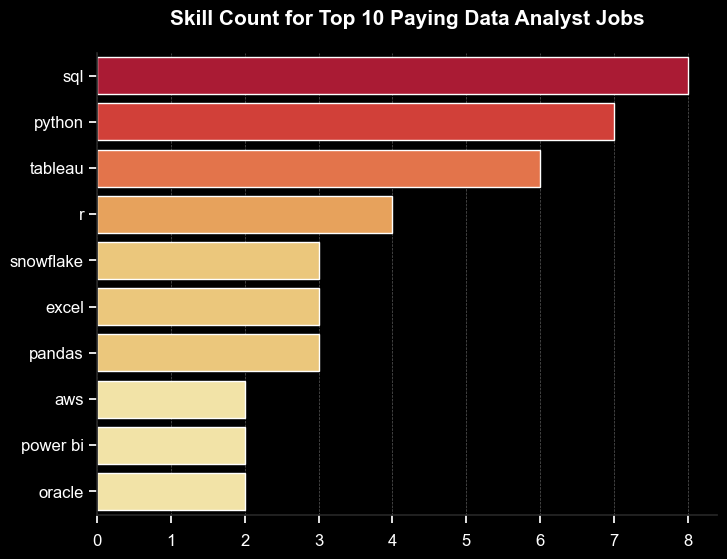

In [12]:
plt.figure(figsize=(8, 6), facecolor="black")

palette= sns.color_palette("YlOrRd", n_colors=6)

sns.set_theme(style="ticks")
sns.barplot(data=job_skills, x="skill_count", y="skills", hue="skill_count", palette=palette, legend=False)
sns.despine()

ax = plt.gca()  # Pobierz bieżący obiekt osi
ax.set_facecolor("black")  # Zmiana koloru tła na jasnoszary
# Ustawienia kolorów osi


plt.grid(axis="x", color="gray", linestyle="--", linewidth=0.5, alpha=0.7, zorder=0)
plt.title("Skill Count for Top 10 Paying Data Analyst Jobs", color='white', fontsize=15, fontweight='bold', pad=20)  
plt.ylabel("")  
plt.xlabel("")  

ax.tick_params(axis='x', colors='white', labelsize=12)  
ax.tick_params(axis='y', colors='white', labelsize=12)  
ax.xaxis.set_tick_params(pad=8)

plt.show()